# <b><u>Machine Learning</u></b> | <b><u>Assignment 2</u></b>

## <u>Problem Statement (2) | ML Based Network Intrusion Detection</u>

## <b>#	Step 1: Import Libraries/Dataset</b>

In [3]:
#	Step 1: Import Libraries/Dataset

import pandas as pd

URL = "https://raw.githubusercontent.com/jmnwong/NSL-KDD-Dataset/refs/heads/master/KDDTrain%2B.txt"

# Column names: 41 features from the metadata + 2 extra fields present in NSL-KDD (label, difficulty)
cols = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
    "wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised",
    "root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
    "num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate",
    "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
    "dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
    "dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "label",          # multiclass textual label (e.g., normal, neptune, smurf, ...)
    "difficulty"      # integer difficulty level in NSL-KDD
]

# Read as CSV: fields are comma-separated in KDDTrain+
df = pd.read_csv(
    URL,
    header=None,
    names=cols
)

## <b>#	Step 2: Data Visualization and Exploration</b>

### <b><u># Step 2.A : Print 5 rows for sanity check</u></b>


In [12]:
# Display first 5 rows (sanity check)
print("First 5 rows of the dataset:")
display(df.head())

# Dataset shape
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Column names
print("\nColumns in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

# Unique values in target column
print("\nUnique Target Labels:")
print(df['label'].unique())


First 5 rows of the dataset:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21



Dataset Shape: 125973 rows × 43 columns

Columns in the dataset:
1. duration
2. protocol_type
3. service
4. flag
5. src_bytes
6. dst_bytes
7. land
8. wrong_fragment
9. urgent
10. hot
11. num_failed_logins
12. logged_in
13. num_compromised
14. root_shell
15. su_attempted
16. num_root
17. num_file_creations
18. num_shells
19. num_access_files
20. num_outbound_cmds
21. is_host_login
22. is_guest_login
23. count
24. srv_count
25. serror_rate
26. srv_serror_rate
27. rerror_rate
28. srv_rerror_rate
29. same_srv_rate
30. diff_srv_rate
31. srv_diff_host_rate
32. dst_host_count
33. dst_host_srv_count
34. dst_host_same_srv_rate
35. dst_host_diff_srv_rate
36. dst_host_same_src_port_rate
37. dst_host_srv_diff_host_rate
38. dst_host_serror_rate
39. dst_host_srv_serror_rate
40. dst_host_rerror_rate
41. dst_host_srv_rerror_rate
42. label
43. difficulty

Unique Target Labels:
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_wr

#### <b><u>Observation for 2.A</u></b>

- The dataset contains **41 features** + **label (target)** + **difficulty**.  
- The **label** column has two types of entries:  
  - `"normal"`  
  - Different attack names (e.g., `neptune`, `smurf`, `back`, etc.).  
- For modeling, these will later be mapped to **binary classes**:  
  - `Normal` vs `Attack`.  



### <b><u>Step 2.B : Data Visualizations</u></b>


#### <b><u>Step 2.B.1 : Distribution of Class Labels</u></b>

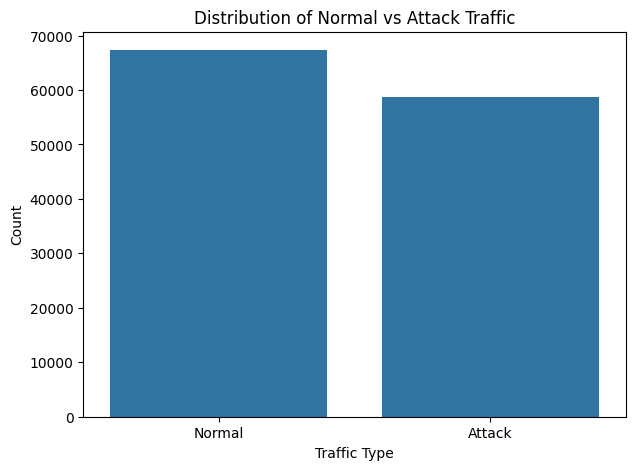

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.countplot(x=df['label'].apply(lambda x: 'Normal' if x=='normal' else 'Attack'))
plt.title("Distribution of Normal vs Attack Traffic")
plt.xlabel("Traffic Type")
plt.ylabel("Count")
plt.show()


##### <b>Observation for Distribution of Class Labels</b>

- The dataset is **imbalanced**: Attack traffic dominates compared to Normal traffic.  
- This **class imbalance** must be considered during model evaluation.  
- Use metrics like **F1-score**, **Precision**, and **Recall** instead of relying only on **Accuracy**.  


#### <b><u>Step 2.B.2 : Protocol & Service Distribution</u></b>

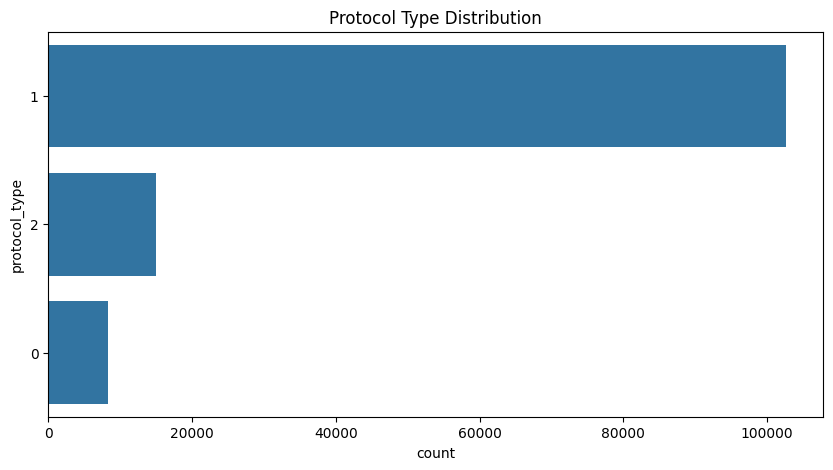

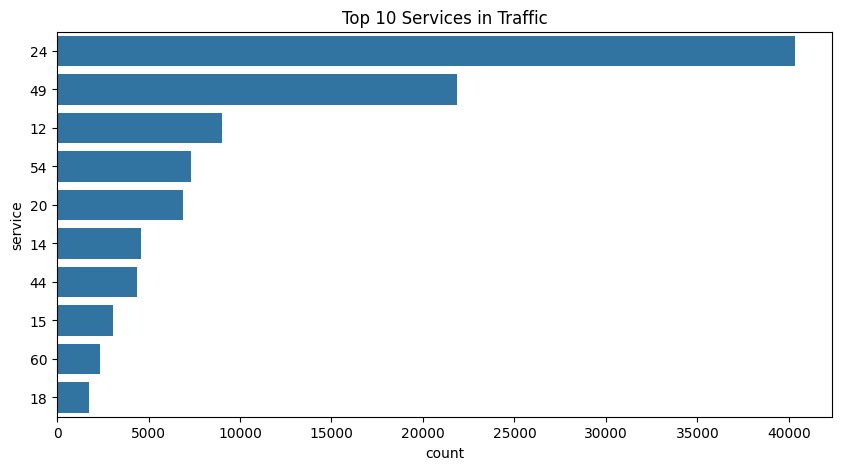

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['protocol_type'], order=df['protocol_type'].value_counts().index)
plt.title("Protocol Type Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y=df['service'], order=df['service'].value_counts().head(10).index)
plt.title("Top 10 Services in Traffic")
plt.show()


##### <b>Observation for Protocol & Service Distribution</b>

- **Protocol Type**: Often dominated by **TCP**, followed by **UDP** and **ICMP**.  
- **Service**: Commonly dominated by `http`, `private`, `smtp`, and `domain_u`.  
- This highlights that **different protocols/services correlate with different attack patterns**.  


#### <b><u>Step 2.B.3 : Boxplot for Numeric Feature Example</u></b>

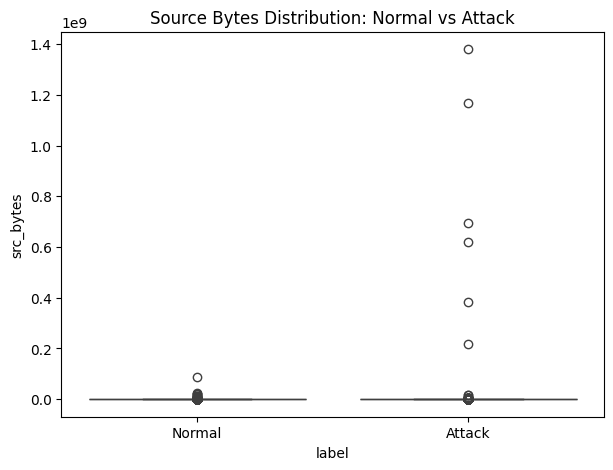

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['label'].apply(lambda x: 'Normal' if x=='normal' else 'Attack'),
            y=df['src_bytes'])
plt.title("Source Bytes Distribution: Normal vs Attack")
plt.show()

##### <b>Observation for Boxplot for Numeric Feature Example</b>

- Numeric features like `src_bytes` and `dst_bytes` show **different distributions** for **Normal** vs **Attack** traffic.  
- Some attacks (e.g., **DoS**) flood with very high byte counts.  
- Other attacks may generate **very few bytes** compared to normal traffic.  

### <b><u># Step 2.C : Correlation Analysis</u></b>


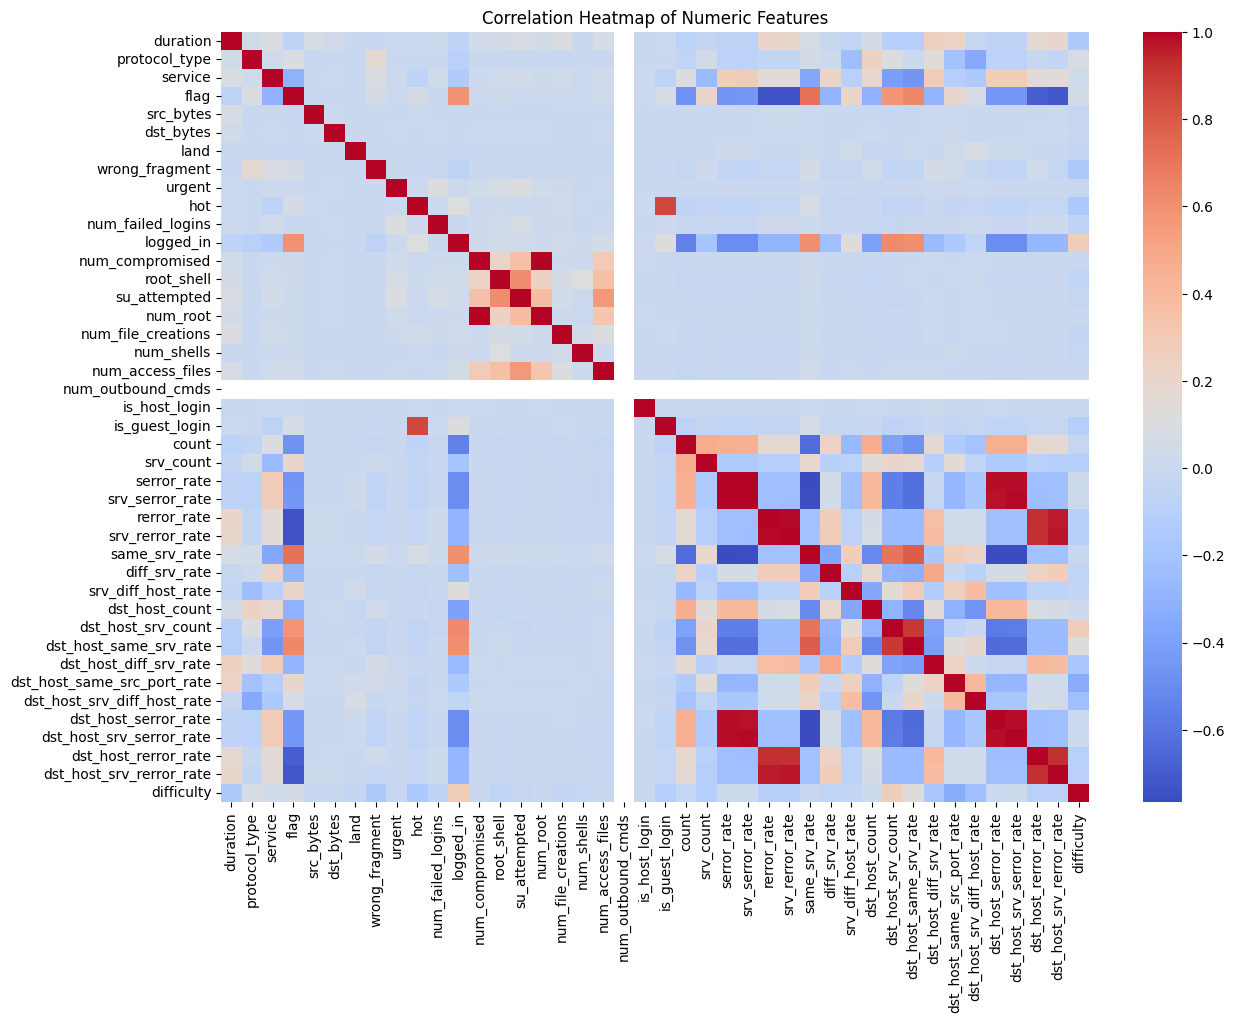

In [18]:

numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



#### <b><u>Observation for Correlation Analysis</u></b>

- Some features are **highly correlated**, e.g., `serror_rate`, `srv_serror_rate`, `dst_host_serror_rate`, etc.  
  - These represent similar **error percentages** and may add **redundant information**.  
- Features like `num_outbound_cmds` are often **constant = 0**, providing **no useful information**.   



#### <b><u>Will correlation affect feature selection ?</u></b>

Yes.

- High correlation means features carry overlapping information (**multicollinearity**).  

- Including all such correlated features can make models (like **Logistic Regression**) unstable, increasing variance and slowing computation.  

- In **Decision Trees** or **Random Forests**, redundancy is less harmful, but removing correlated features still helps simplify the model.  

Therefore, in the **feature selection** step, we will consider removing:  
- Highly correlated numeric features  
- Constant features  




## <b>Step 3: Data Pre-processing and Cleaning</b>

In [20]:
# Check for missing/null values
print("Missing values in dataset:\n", df.isnull().sum())

# Summary statistics to detect extreme outliers/skewness
print("\nSummary statistics:")
print(df.describe())

# Check skewness of numerical columns
skewness = df.select_dtypes(include=[np.number]).skew().sort_values(ascending=False)
print("\nSkewness of numerical features:\n", skewness)

# Encoding categorical variables (protocol_type, service, flag)
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['protocol_type', 'service', 'flag']
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Encode target column: Normal -> 0, Attack -> 1
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)


Missing values in dataset:
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate  

### <b><u>Explanation for Data Pre-processing and Cleaning</u></b>

- **Missing Values** – Dataset has no NULL values (verified).  
- **Outliers** – Some numeric features like `src_bytes` and `dst_bytes` show very high variance and extreme values. Since these are genuine network traffic behaviors (not data errors), we keep them but later apply scaling.  
- **Skewness** – Features like `src_bytes` are heavily skewed. Skewed data can bias the model, so normalization/standardization is needed.  
- **Encoding** – Converted categorical features (`protocol_type`, `service`, `flag`) into numeric using **Label Encoding**. Target variable converted into binary (`0 = Normal`, `1 = Attack`).  


In [ ]:
# Step 4: Model Building [11M]

In [ ]:
# Step 5: Performance Evaluation [6M]

In [ ]:
# Step 6: Conclusion